In [77]:
%matplotlib inline
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import sys

from sklearn.model_selection import KFold
#from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import random

In [78]:
a2 = nx.read_edgelist("Avengers2_edge_list.txt", data=(('weight',float),))
a1 = nx.read_edgelist("Avengers1_edge_list.txt", data=(('weight',float),))
sm1 = nx.read_edgelist("Spider-Man_Homecoming_edge_list.txt", data=(('weight',float),))
tr = nx.read_edgelist("Thor_Ragnarok_edge_list.txt", data=(('weight',float),))

In [79]:
def standardize_names(g):

    new_names = {'BlackWidow':'Black_Widow',
             'Captin_America':'Captain_America','CaptainAmerica':'Captain_America',
             'Clint_Barton':'Hawkeye',
             'Iron_Man':'IronMan',
             'NickFury':'Nick_Fury',
             'ScarletWitch':'Scarlet_Witch',
             'WarMachine':'War_Machine'}

    fixes = set(new_names.keys()) - set(g.nodes())
    
    for fix in fixes:
        del new_names[fix]
        
    return nx.relabel_nodes(g, new_names)

In [80]:
a1 = standardize_names(a1)
a2 = standardize_names(a2)
sm1 = standardize_names(sm1)
tr = standardize_names(tr)

In [81]:
def combine_weighted_graphs(g,h):
    ''' Need special function to combined graphs with weighted edges where you want the weights of edges
    in both graphs to be added together'''
    
    combined = nx.Graph()

    # standardize edge name ordering
    g_edges = [tuple(sorted(x)) for x in g.edges]
    h_edges = [tuple(sorted(x)) for x in h.edges]
  
    add_weights_edges = set(g_edges) & set(h_edges)
    
    for edge in add_weights_edges:
        weight = g[edge[0]][edge[1]]['weight'] + h[edge[0]][edge[1]]['weight']
        combined.add_edge(edge[0], edge[1], weight=weight)
   
    # edges in g not in h
    unique_edges = set(g_edges) - set(h_edges)
    for edge in unique_edges:
        combined.add_edge(edge[0],edge[1], weight=g[edge[0]][edge[1]]['weight'])

    # edges in h not in g
    unique_edges = set(h_edges) - set(g_edges)
    for edge in unique_edges:
        combined.add_edge(edge[0],edge[1], weight=h[edge[0]][edge[1]]['weight'])
                       
    return combined

In [82]:
def display_graph(g):
    elarge = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] > 5]
    esmall = [(u, v) for (u, v, d) in g.edges(data=True) if d['weight'] <= 5]

    pos = nx.spring_layout(g)  # positions for all nodes

    plt.figure(figsize=(15,15))


    # nodes
    nx.draw_networkx_nodes(g, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(g, pos, edgelist=elarge,
                           width=6)
    nx.draw_networkx_edges(g, pos, edgelist=esmall,
                           width=2, alpha=0.5, edge_color='b')

    # labels
    nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')

    plt.axis('off')
    plt.show()

    return None

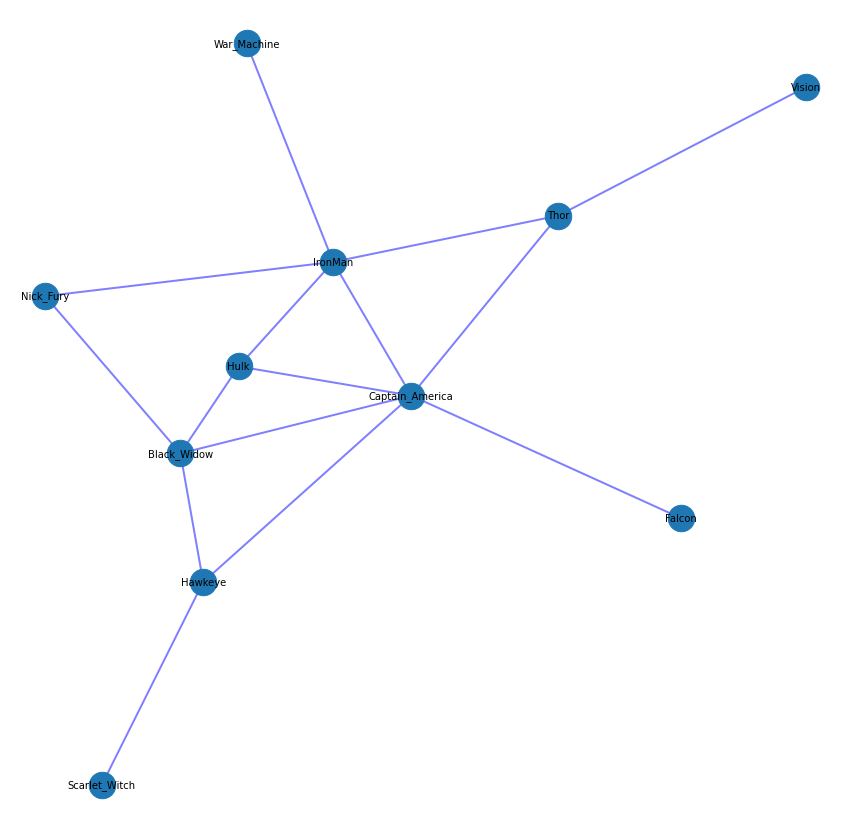

In [83]:
display_graph(a2)

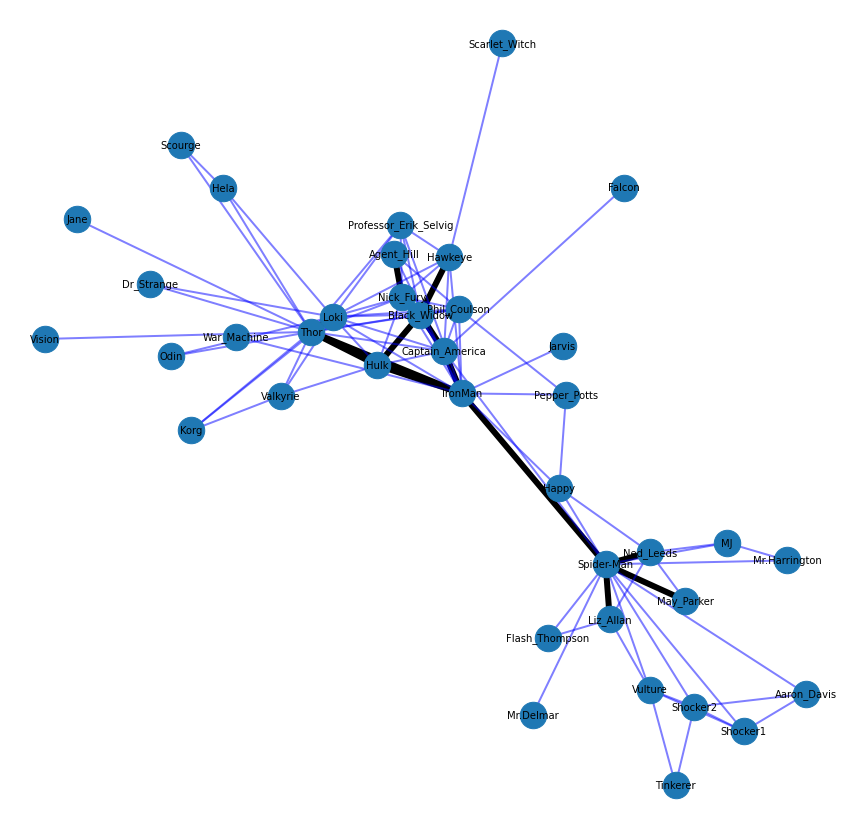

In [84]:
combined = combine_weighted_graphs(a1, a2)
c2 = combine_weighted_graphs(combined, sm1)
c3 = combine_weighted_graphs(c2, tr)
display_graph(c3)

In [85]:
c3_list = list(c3.edges)
c3_list

[('Hulk', 'Loki'),
 ('Hulk', 'Thor'),
 ('Hulk', 'Captain_America'),
 ('Hulk', 'Nick_Fury'),
 ('Hulk', 'Black_Widow'),
 ('Hulk', 'IronMan'),
 ('Hulk', 'Valkyrie'),
 ('Loki', 'Thor'),
 ('Loki', 'Black_Widow'),
 ('Loki', 'Phil_Coulson'),
 ('Loki', 'Nick_Fury'),
 ('Loki', 'IronMan'),
 ('Loki', 'Professor_Erik_Selvig'),
 ('Loki', 'Hawkeye'),
 ('Loki', 'Captain_America'),
 ('Loki', 'Hela'),
 ('Loki', 'Odin'),
 ('Loki', 'Valkyrie'),
 ('Loki', 'Korg'),
 ('Loki', 'Dr_Strange'),
 ('Thor', 'Professor_Erik_Selvig'),
 ('Thor', 'IronMan'),
 ('Thor', 'Jane'),
 ('Thor', 'Captain_America'),
 ('Thor', 'Phil_Coulson'),
 ('Thor', 'Nick_Fury'),
 ('Thor', 'Black_Widow'),
 ('Thor', 'Vision'),
 ('Thor', 'Hela'),
 ('Thor', 'Odin'),
 ('Thor', 'Korg'),
 ('Thor', 'Scourge'),
 ('Thor', 'Valkyrie'),
 ('Thor', 'Dr_Strange'),
 ('Liz_Allan', 'Spider-Man'),
 ('Liz_Allan', 'Vulture'),
 ('Liz_Allan', 'Flash_Thompson'),
 ('Liz_Allan', 'Ned_Leeds'),
 ('Spider-Man', 'Shocker2'),
 ('Spider-Man', 'Shocker1'),
 ('Spider-Man', 

In [86]:
percent75 = round(len(c3_list)*0.75)
percent75

70

In [87]:
c3_l_s = random.sample(c3_list, percent75)

In [88]:
c3_l_s

[('Hawkeye', 'Black_Widow'),
 ('IronMan', 'Captain_America'),
 ('Spider-Man', 'Mr.Delmar'),
 ('Hawkeye', 'Scarlet_Witch'),
 ('Thor', 'Phil_Coulson'),
 ('Thor', 'Professor_Erik_Selvig'),
 ('Liz_Allan', 'Vulture'),
 ('Hulk', 'IronMan'),
 ('IronMan', 'War_Machine'),
 ('IronMan', 'Agent_Hill'),
 ('Black_Widow', 'Nick_Fury'),
 ('Spider-Man', 'Flash_Thompson'),
 ('Thor', 'Dr_Strange'),
 ('IronMan', 'Jarvis'),
 ('Thor', 'Captain_America'),
 ('Spider-Man', 'Mr.Harrington'),
 ('Liz_Allan', 'Flash_Thompson'),
 ('Loki', 'Dr_Strange'),
 ('Black_Widow', 'Captain_America'),
 ('Loki', 'Nick_Fury'),
 ('Spider-Man', 'IronMan'),
 ('Thor', 'Nick_Fury'),
 ('Shocker2', 'Vulture'),
 ('Shocker1', 'Vulture'),
 ('IronMan', 'Professor_Erik_Selvig'),
 ('Thor', 'Black_Widow'),
 ('Loki', 'Korg'),
 ('Hulk', 'Black_Widow'),
 ('Hela', 'Scourge'),
 ('Spider-Man', 'Ned_Leeds'),
 ('Hawkeye', 'Captain_America'),
 ('IronMan', 'Phil_Coulson'),
 ('Loki', 'Odin'),
 ('Spider-Man', 'Shocker1'),
 ('IronMan', 'Happy'),
 ('Ned_Le

In [89]:
g = nx.Graph()
g.add_edges_from(c3_l_s)
g.edges

EdgeView([('Hawkeye', 'Black_Widow'), ('Hawkeye', 'Scarlet_Witch'), ('Hawkeye', 'Captain_America'), ('Hawkeye', 'Loki'), ('Hawkeye', 'IronMan'), ('Hawkeye', 'Professor_Erik_Selvig'), ('Black_Widow', 'Nick_Fury'), ('Black_Widow', 'Captain_America'), ('Black_Widow', 'Thor'), ('Black_Widow', 'Hulk'), ('Black_Widow', 'IronMan'), ('Black_Widow', 'Phil_Coulson'), ('Black_Widow', 'Professor_Erik_Selvig'), ('IronMan', 'Captain_America'), ('IronMan', 'Hulk'), ('IronMan', 'War_Machine'), ('IronMan', 'Agent_Hill'), ('IronMan', 'Jarvis'), ('IronMan', 'Spider-Man'), ('IronMan', 'Professor_Erik_Selvig'), ('IronMan', 'Phil_Coulson'), ('IronMan', 'Happy'), ('IronMan', 'Pepper_Potts'), ('IronMan', 'Thor'), ('IronMan', 'Nick_Fury'), ('Captain_America', 'Thor'), ('Captain_America', 'Phil_Coulson'), ('Captain_America', 'Loki'), ('Captain_America', 'Hulk'), ('Spider-Man', 'Mr.Delmar'), ('Spider-Man', 'Flash_Thompson'), ('Spider-Man', 'Mr.Harrington'), ('Spider-Man', 'Ned_Leeds'), ('Spider-Man', 'Shocker1')

In [90]:
c3.remove_edges_from(c3_l_s)

In [115]:
display_graph(g)

KeyError: 'weight'

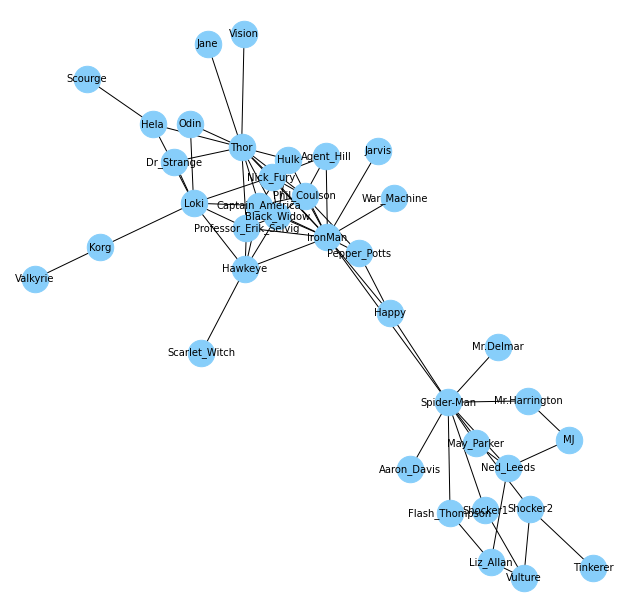

In [123]:
pos = nx.spring_layout(g)  # positions for all nodes

plt.figure(figsize=(11,11))


# nodes
nx.draw_networkx_nodes(g, pos, node_size=700, node_color = 'lightskyblue')

# edges
nx.draw_networkx_edges(g, pos)

# labels
nx.draw_networkx_labels(g, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

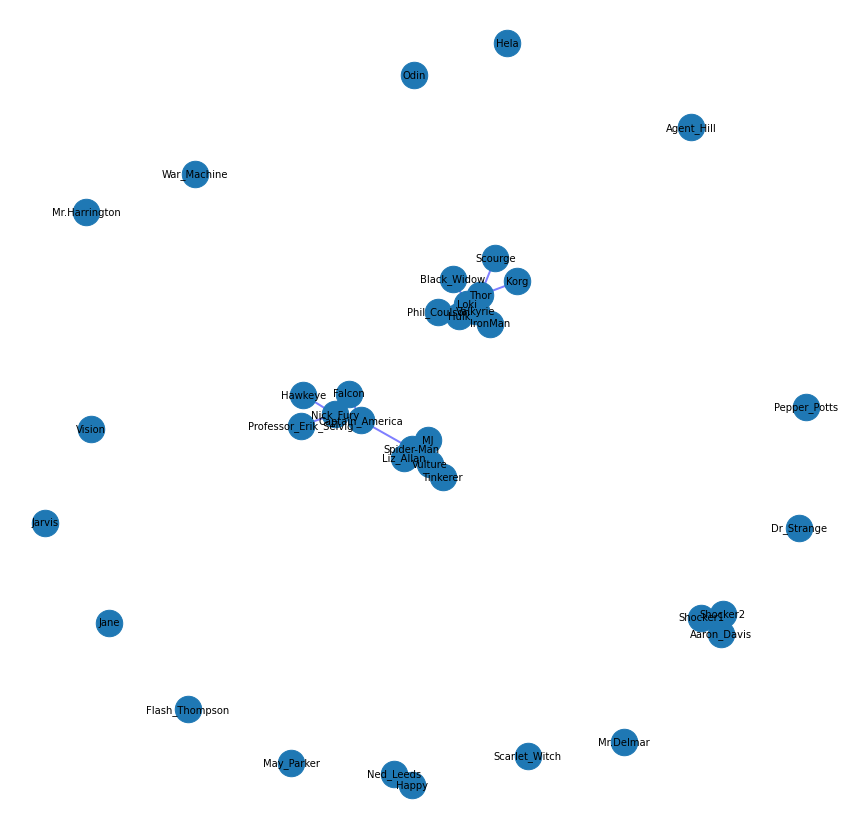

In [122]:
display_graph(c3)

In [93]:
combined = combine_weighted_graphs(a1, a2)
c2 = combine_weighted_graphs(combined, sm1)
full = combine_weighted_graphs(c2, tr)

In [94]:
#! pip install networkx nx_altair

In [95]:
import altair as alt
import nx_altair as nxa

In [96]:
#df = nx.to_pandas_dataframe(full,"P1","P2","weight")

In [97]:
G = nx.Graph()
G.add_edge('a','b')
G['a']['b']['weight']=3
G.add_edge('b','c')
G['b']['c']['weight']=2
G.add_edge('a','c')
G['a']['c']['weight']=1
G.add_edge('b','d')
G['b']['d']['weight']=4

In [98]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

In [99]:
import pandas as pd

In [100]:
df = pd.read_csv("test_edge_list.csv")
df.head()

,P1,P2,weight
0,Nick_Fury,Agent_Hill,9
1,Nick_Fury,Phil_Coulson,3
2,Phil_Coulson,Agent_Hill,2
3,Nick_Fury,Professor_Erik_Selvig,1
4,Nick_Fury,Clint_Barton,1


In [101]:
G = nx.from_pandas_edgelist(df, 'P1','P2',['weight'])

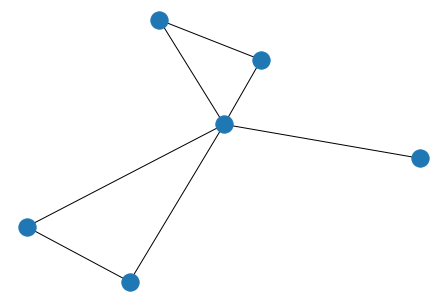

In [102]:
pos = nx.spring_layout(G)
nx.draw(G,pos=pos)

In [103]:
pos = nx.spring_layout(G)
viz = nxa.draw_networkx(
    G, pos=pos,
    node_color='blue',
    width='weight',
    edge_color='black',
    node_tooltip=['weight','P1'],
).interactive()

viz

ValueError: weight encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.LayerChart(...)

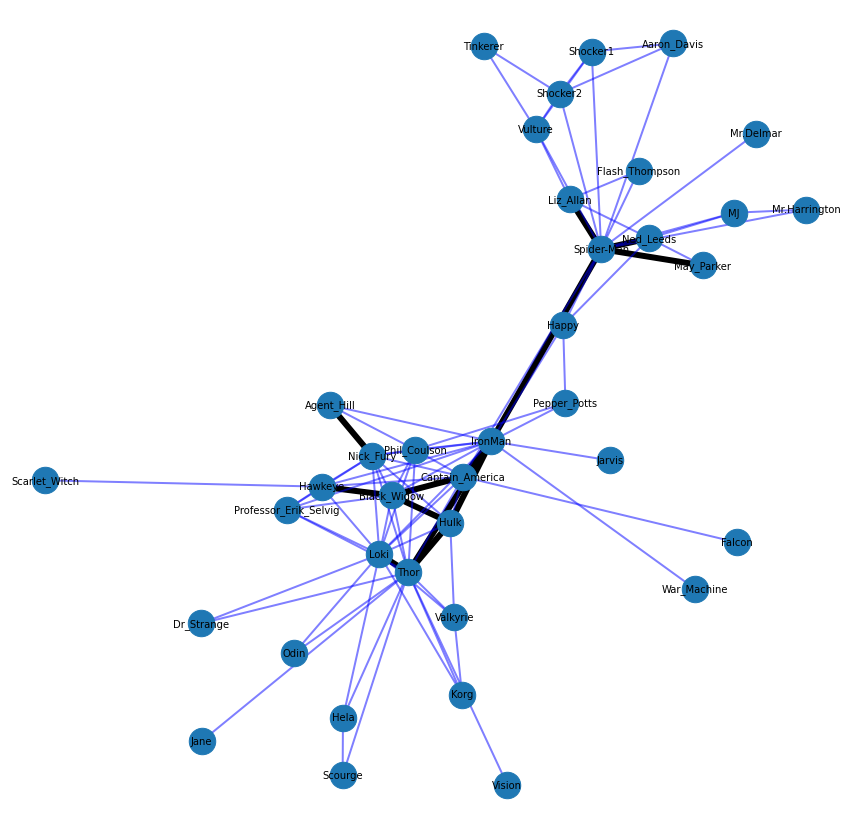

In [104]:
display_graph(full)

In [105]:
#returns Common Neighbr Distance for given nodes x and y 
def common_neighbor_distance (g, x, y) :
    cn = len(list(nx.common_neighbors(g, x, y)))
    if(cn > 0):
        return (1 + cn)/2
    else:
        return 1/nx.shortest_path_length(g, source = x, target = y)
    
#returns Sorenson Index for given nodes x and y
def sorenson_index (g, x, y) :
    cn = len(list(nx.common_neighbors(g, x, y)))
    return 2*cn/(g.degree(x)+g.degree(y))

#Similarity between two nodes using the Hub Promoted Index
def hpi(G,x,y):
    return len(list(nx.common_neighbors(G, x, y)))/min(G.degree(x),G.degree(y))   

#common neighbor and closeness (method proposed in paper)
def cnc(g, x, y, a):
    intersect = len(list(nx.common_neighbors(g, x, y)))
    return a*intersect + (1-a)*g.number_of_nodes()/nx.shortest_path_length(g, source = x, target = y)

In [106]:
#iterates through all pairs of nodes
#returns dataframe with all metric values for each pair
def metric_iterator (g) :
    df = pd.DataFrame(columns = ['first', 'second', 'CND', 'PA', 'AA', 'CN', 'SI', 'JI', 'RA', 'HPI', 'connected'])
    nodes = list(g)
    for x in range(0, g.number_of_nodes()):
        for y in range(x + 1, g.number_of_nodes()):
            #call 8 metrics and add to dataframe
            scores = dict()
            scores['first'] = nodes[x]
            scores['second'] = nodes[y]
            scores['CND'] = round(common_neighbor_distance(g, nodes[x], nodes[y]), 3)
            scores['PA'] = int(list(nx.preferential_attachment(g, [(nodes[x], nodes[y])]))[0][2])
            scores['AA'] = round(list(nx.adamic_adar_index(g, [(nodes[x], nodes[y])]))[0][2], 3)
            scores['CN'] = len(list(nx.common_neighbors(g, nodes[x], nodes[y])))
            scores['SI'] = round(sorenson_index(g, nodes[x], nodes[y]), 3)
            scores['JI'] = round(list(nx.jaccard_coefficient(g, [(nodes[x], nodes[y])]))[0][2], 3)
            scores['RA'] = round(list(nx.resource_allocation_index(g, [(nodes[x], nodes[y])]))[0][2], 3)
            scores['HPI'] = round(hpi(g, nodes[x], nodes[y]), 3)
            #scores['CNC'] = cnc(g, nodes[x], nodes[y], .5) # setting a = 0.5
            scores['connected'] = g.has_edge(nodes[x], nodes[y])
            newRow = pd.Series(data = scores, name = "" + nodes[x] + "," + nodes[y])
            df = df.append(newRow, ignore_index = False)
            
    return df

In [107]:
metric_iterator(g)

,first,second,CND,PA,AA,CN,SI,JI,RA,HPI,connected
"Hawkeye,Black_Widow",Hawkeye,Black_Widow,2.000,48,1.514,3,0.429,0.273,0.414,0.500,True
"Hawkeye,IronMan",Hawkeye,IronMan,2.000,84,1.616,3,0.300,0.176,0.468,0.500,True
"Hawkeye,Captain_America",Hawkeye,Captain_America,2.000,42,1.341,3,0.462,0.300,0.321,0.500,True
"Hawkeye,Spider-Man",Hawkeye,Spider-Man,1.000,60,0.379,1,0.125,0.067,0.071,0.167,False
"Hawkeye,Mr.Delmar",Hawkeye,Mr.Delmar,0.333,6,0.000,0,0.000,0.000,0.000,0.000,False
...,...,...,...,...,...,...,...,...,...,...,...
"Valkyrie,Tinkerer",Valkyrie,Tinkerer,0.143,1,0.000,0,0.000,0.000,0.000,0.000,False
"Valkyrie,Jane",Valkyrie,Jane,0.200,1,0.000,0,0.000,0.000,0.000,0.000,False
"Aaron_Davis,Tinkerer",Aaron_Davis,Tinkerer,0.333,1,0.000,0,0.000,0.000,0.000,0.000,False
"Aaron_Davis,Jane",Aaron_Davis,Jane,0.250,1,0.000,0,0.000,0.000,0.000,0.000,False


In [108]:
#given list of recall and presicion, removes null points(0,0)
def remove_null_points (x, y) :
    arange = []
    for i in range(len(x)):
        if((x[i] == 0) and (y[i] == 0)):
            arange.append(i)
    x = np.delete(x, arange, 0)
    y = np.delete(y, arange, 0)
    return x, y

In [109]:
#function metric_evaluation
#parameter g, graph to evaluate similarity metrics on 
def metric_evaluation(g):

    df = metric_iterator(g)
    metric_frame = df.drop(['first', 'second'], axis = 1)
    data = []

    for column in metric_frame.columns:
        #normalize our metrics
       # if (nx.NetworkXNoPath):
        #    pass
        if(column != "connected"):
           # if (nx.NetworkXNoPath):
            #    pass
            x = df[[column]].values.astype(float)
            min_max_scaler = preprocessing.MinMaxScaler()
            x_scaled = min_max_scaler.fit_transform(x)
            df_normalized = pd.DataFrame(x_scaled)
            precision, recall, thresholds = precision_recall_curve(list(df['connected']), list(df_normalized[0]))
            precision, recall = remove_null_points(precision, recall)
            area = auc(recall, precision)
            data.append([column + ": " + "%.3f" % area, precision, recall])
            
    for index in data:
        plt.plot(index[2], index[1], label = index[0])
        # Put a legend to the right of the current axis
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'AUC')
        plt.ylabel("Precision")
        plt.xlabel("Recall")
        plt.suptitle("Precision-Recall Curve")

In [110]:
def roc(g):
    
    df = metric_iterator(g)
    metric_frame = df.drop(['first', 'second'], axis = 1)
    data = []

    for column in metric_frame.columns:
        #normalize our metrics
        if(column != "connected"):
            x = df[[column]].values.astype(float)
            min_max_scaler = preprocessing.MinMaxScaler()
            x_scaled = min_max_scaler.fit_transform(x)
            df_normalized = pd.DataFrame(x_scaled)
            dflist = list(df['connected'])
            dfnorm = list(df_normalized[0])
            fpr, tpr, thresholds = roc_curve(dflist, dfnorm)
            fpr, tpr = remove_null_points(fpr,tpr)
            #roc_auc = metrics.auc(fpr, tpr)
           # if(column == 'CNC'):
           #     print(fpr)
           #     print(tpr)
           #     print(thresholds)
            area = auc(tpr, fpr)
            data.append([column + ": " + "%.3f" % area, fpr, tpr])


    for index in data:
        plt.plot(index[2], index[1], label = index[0])
        # Put a legend to the right of the current axis
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'AUC')
        plt.ylabel("True Positive Rate")
        plt.xlabel("False Positive Rate")
        plt.suptitle("Receiver Operating Characteristic (ROC) Curve")

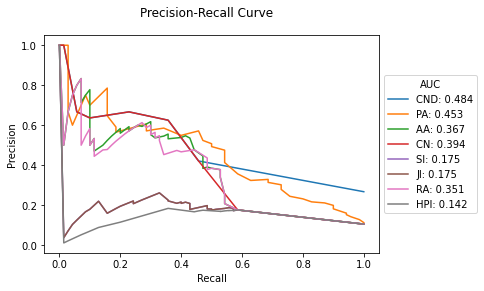

In [111]:
metric_evaluation(g)

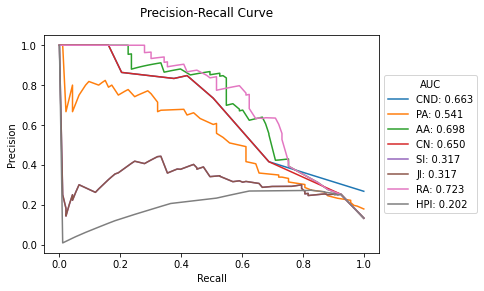

In [112]:
metric_evaluation(full)

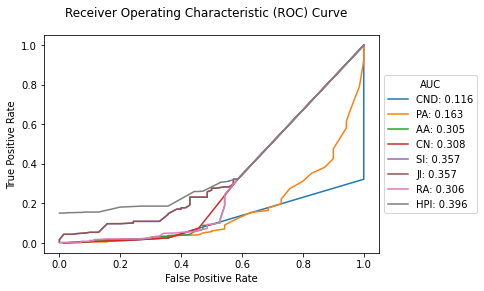

In [113]:
roc(g)

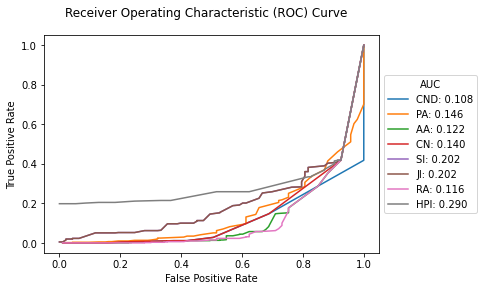

In [114]:
roc(full)